In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

Import Train Data (Test with Data 1)

RET_118    0.309743 the highest correlation with y_train


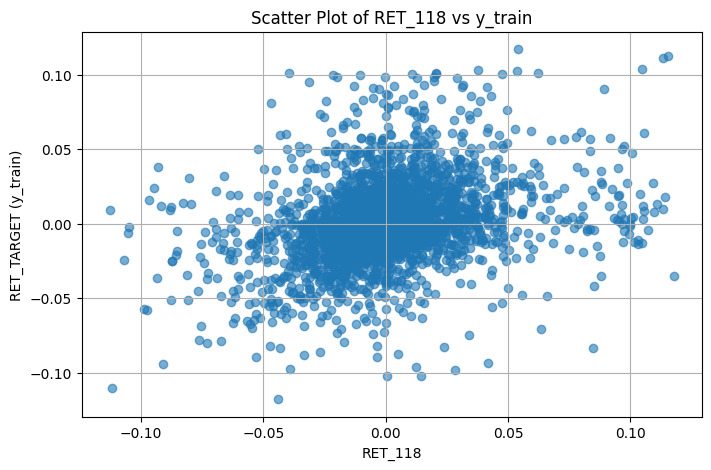

In [ ]:
# Import 
root_path = "C:/QRT 2025 Reconstruction of Liquid Asset Performance/Data/Manipulated Data"

data_1_path = root_path + "/Data_1.csv"

# print(data_1_path)
data_1 = pd.read_csv(data_1_path)
# data_1.head()

# Adjust all NaN values in data_1 to 0
data_1.fillna(0, inplace=True)

# List of columns in data_1
columns = data_1.columns.tolist()

# Constructing illuqid assets
x_train = pd.DataFrame()

for i in range(2, 102):
    x_train[columns[i]] = data_1[columns[i]]

# Constructing liquid assets
y_train = data_1['RET_TARGET']

# Normalize the x_train
x_train = (x_train - x_train.mean()) / x_train.std()

# Correlation y_train with each asset in x_train
corr_x_to_y = x_train.corrwith(y_train)

# Sort the correlation values
corr_x_to_y_sorted = corr_x_to_y.sort_values(ascending=False)

# Print the highest correlation with y_train without dtype
print(corr_x_to_y_sorted.head(1).to_string(), "the highest correlation with y_train")

# Scatter plot of y_train vs data_1['RET_118']
plt.figure(figsize=(8,5))
plt.scatter(data_1['RET_118'], y_train, alpha=0.6)
plt.xlabel('RET_118')
plt.ylabel('RET_TARGET (y_train)')
plt.title('Scatter Plot of RET_118 vs y_train')
plt.grid(True)
plt.show()

Simlpe Linear Regression Model

Coefficient: 0.2985
Intercept: 0.0008
                            OLS Regression Results                            
Dep. Variable:             RET_TARGET   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     264.9
Date:                Sat, 07 Feb 2026   Prob (F-statistic):           1.11e-56
Time:                        13:41:34   Log-Likelihood:                 5399.7
No. Observations:                2498   AIC:                        -1.080e+04
Df Residuals:                    2496   BIC:                        -1.078e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         

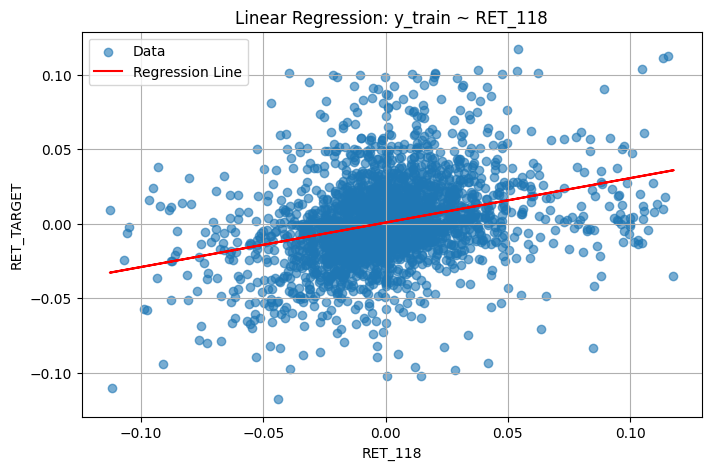

array([-0.00517296])

In [8]:
# Simple Linear Regression Model

def Simple_linear_regression(x, y):
    """
    Fit a linear regression model and return the model.
    
    Parameters:
    x (Series): Feature matrix.
    y (Series): Target variable.
    
    Returns:
    LinearRegression: Fitted linear regression model and summary.
    """
    X = pd.DataFrame(x)  # Constuct X as a DataFrame of x
    y = pd.Series(y)  # Ensure y is a Series

    model = LinearRegression()
    model.fit(X, y)
    print(f"Coefficient: {model.coef_[0]:.4f}")
    print(f"Intercept: {model.intercept_:.4f}")
    
    # Print the summary statistics using statsmodels
    
    model_sm = sm.OLS(y_train, sm.add_constant(X)).fit()  # Fit the model using statsmodels
    print(model_sm.summary())

    # RSS and RSE calculations
    RSS = lambda x: np.sum((y_train - model.predict(x)) ** 2)
    RSE = lambda x: np.sqrt(RSS(x) / (len(x) - 2))

    # Calculate RSS and RSE for the model
    rss_value = RSS(X)
    rse_value = RSE(X)

    print()
    print("RSS", rss_value,"RSE", rse_value)
    
    # Optionally, plot the regression line
    plt.figure(figsize=(8,5))
    plt.scatter(x, y_train, alpha=0.6, label='Data')
    plt.plot(x, model.predict(X), color='red', label='Regression Line')
    plt.xlabel(X.columns[0])
    plt.ylabel(y.name)
    plt.title('Linear Regression: y_train ~ '+ X.columns[0])
    plt.legend()
    plt.grid(True)
    plt.show()
    return model

X = pd.DataFrame({"RET_118":-0.02}, index=[0])

Simple_linear_regression(data_1['RET_118'], y_train).predict(X)
